In [38]:
from scipy import spatial
import numpy as np
from sklearn import cluster
from scipy.cluster.hierarchy import bisect
import sparse_to_array
from scipy import pi
import text_clustering
from heapq import *
from importlib import reload
reload(text_clustering)
from matplotlib import pyplot as plt
%matplotlib inline
# l = [(1,'a'),(2,'b')]
# print(l)
# heappush(l,(9,'s'))
# l

In [40]:
k = 5
samples = 100

data = None

for i in range(k):
    center = np.array((np.cos(2*pi*i/k),np.sin(2*pi*i/k)))
    
    x = np.random.randn(samples,2)/10 + center
    
    if data is not None:
        data = np.vstack((data,x))
    else:
        data = x

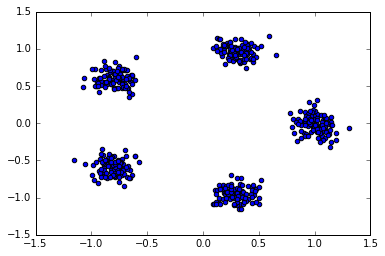

In [41]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [160]:
reload(text_clustering)
clust = text_clustering.BisectingPartitional(candidate_splits=10,min_leaf=25,
                                             max_leaves=20,objective=text_clustering.I2Euc)

clust.fit(data)

In [161]:
print(clust.root.objective)
print(clust.root.improvement())

514.454626322
-225.119637775


In [162]:
clust[5]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
        413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
        426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
        439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
        452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
        465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
        478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
        491, 492, 493, 494, 495, 496, 4

In [135]:
clust.root.split_order

1

In [94]:
text_clustering.I2(clust.data[clust.root.IDs,:])

0.0032488168712768717

In [77]:
np.where(np.array([1,1,1,2,2,2,3,4,5,5,5,4])==4)[0]

array([ 7, 11])

In [51]:
n1 = text_clustering.node([1,2,3])
n2 = text_clustering.node([1,2,3])
n3 = text_clustering.node([1,2,3])
n4 = text_clustering.node([1,2,3])
n5 = text_clustering.node([1,2,3])

In [52]:
n1.objective = 1
n2.objective = 2
n3.objective = 3
n4.objective = 4
n5.objective = 5
n1.children = (n2,n3)
n2.children = (n4,n5)

In [53]:
n1 < n2

True

In [58]:
l = []
heappush(l,n2)
heappush(l,n1)
heappop(l).objective

1